In [35]:
# 线性判别分析
# https://archive.ics.uci.edu/ml/machine-learning-databases/iris/
# 指定特征名
feature_dict = {i:label for i, label in zip(range(4), 
            ('sepal length in cm', 
             'sepal width in cm',
             'petal length in cm',
             'petal width in cm',))}
# print(feature_dict)
import pandas as pd

df = pd.io.parsers.read_csv(
    filepath_or_buffer = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header = None,
    sep = ',',
)
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class_label']
df.dropna(how = 'all', inplace=True)

df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class_label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
from sklearn.preprocessing import LabelEncoder

X = df[['sepal length in cm', 
             'sepal width in cm',
             'petal length in cm',
             'petal width in cm']].values
y = df['class_label'].values
# print(X)

# 类别向量化
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
# print(y)
label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

In [37]:
import numpy as np
np.set_printoptions(precision=4)

# 计算每个类别中每个特征列的均值
mean_vectors = []
for c1 in range(1,4):
  # print(c1) 1 2 3
  mean_vectors.append(np.mean(X[y==c1], axis=0))
  print('Mean vector class %s: %s\n' %(c1, mean_vectors[c1-1]))

# print(mean_vectors)

Mean vector class 1: [5.006 3.418 1.464 0.244]

Mean vector class 2: [5.936 2.77  4.26  1.326]

Mean vector class 3: [6.588 2.974 5.552 2.026]



In [39]:
# 计算两个4*4矩阵：类内散布矩阵和类间散布矩阵
S_W = np.zeros((4,4))
# print(S_W)
for c1, mv in zip(range(1,4), mean_vectors):
  class_sc_mat = np.zeros((4,4))
  for row in X[y==c1]:
    # print(row)
    row, mv = row.reshape(4,1), mv.reshape(4,1)
    class_sc_mat += (row-mv).dot((row-mv).T)
  S_W += class_sc_mat
print('with-class Scatter Matrix:\n', S_W)

with-class Scatter Matrix:
 [[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


In [45]:
# 计算类间散布矩阵
# 全局均值
overall_mean = np.mean(X, axis=0)
print(overall_mean)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):
  n = X[y==i+1,:].shape[0]
  # print(n)  50,每个类别中样本都是50个
  mean_vec = mean_vec.reshape(4,1)
  S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Mattrix:\n', S_B)


[5.8433 3.054  3.7587 1.1987]
between-class Scatter Mattrix:
 [[ 5307.7201   994.1255  2739.0432 -1291.3312]
 [  994.1255  1801.79    1360.4517  2123.9509]
 [ 2739.0432  1360.4517  3455.9735  2003.9111]
 [-1291.3312  2123.9509  2003.9111  5057.7351]]


In [48]:
# 求矩阵的特征值,np.linalg.inv(S_W)表示求逆
# np.linalg.eig：计算特征值，特征向量
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
  eigvec_sc = eig_vecs[:,i].reshape(4,1)
  # 输出特征向量
  print('\nEigenvector {}:\n{}'.format(i+1, eigvec_sc.real))
  # 输出特征值
  print('Eigenvalue {}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1:
[[ 0.1911]
 [ 0.0297]
 [-0.0056]
 [-0.9811]]
Eigenvalue 1: 1.06e+03

Eigenvector 2:
[[ 0.4707]
 [-0.5257]
 [-0.4724]
 [ 0.5281]]
Eigenvalue 2: 4.05e-02

Eigenvector 3:
[[-0.6106]
 [ 0.0539]
 [-0.7866]
 [-0.0743]]
Eigenvalue 3: 1.22e+02

Eigenvector 4:
[[ 0.3418]
 [ 0.6427]
 [-0.677 ]
 [ 0.1085]]
Eigenvalue 4: 7.57e+01


In [49]:
# 特征向量：表示映射方向
# 特征值：特征向量的重要程度

# 对特征值进行降序排序
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
  print(i[0])

Eigenvalues in decreasing order:

1059.6390686874681
122.47897399120167
75.71077162552268
0.04046054601861165


In [50]:
# 输出各个特征占总体方差的百分比
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
  print('eigenvalue {0:}: {1:.2%}'.format(i+1,(j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 84.24%
eigenvalue 2: 9.74%
eigenvalue 3: 6.02%
eigenvalue 4: 0.00%


In [53]:
# 选择前两维特征
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W :\n',W.real)

Matrix W :
 [[ 0.1911 -0.6106]
 [ 0.0297  0.0539]
 [-0.0056 -0.7866]
 [-0.9811 -0.0743]]


In [0]:
# 由150*4变成了150*2
X_lda = X.dot(W)
assert X_lda.shape == (150,2), 'The matrix is not 150*2 dimensional'

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


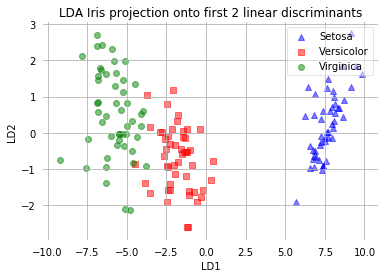

In [72]:

from matplotlib import pyplot as plt


def plot_step_lda():
  # 其中参数111,指的是将图像分成1行1列,此图是第一个图
  ax = plt.subplot(111)
  for label, marker, color in zip(
      range(1,4), ('^', 's', 'o'),('blue','red','green')):
    plt.scatter(x=X_lda[:,0].real[y==label],
          y=X_lda[:,1].real[y==label],
          marker=marker,
          color=color,
          alpha=0.5,
          label=label_dict[label]
          )
  plt.xlabel('LD1')
  plt.ylabel('LD2')
  leg = plt.legend(loc='upper right', fancybox=True)
  leg.get_frame().set_alpha(0.5)
  plt.title('LDA Iris projection onto first 2 linear discriminants')

  # hidden axis ticks 
  plt.tick_params(axis='both', which='both', bottom='off',
          labelbottom='on', left='off', right='off', labelleft='on')
  # remove axis spines
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)

  plt.grid()
  plt.tight_layout
  plt.show()

# 画图
plot_step_lda()


In [0]:
# 下面使用sklearn实现LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

sklearn_LDA = LDA(n_components=2)
X_lda = sklearn_LDA.fit_transform(X, y)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


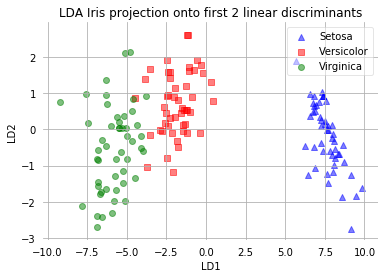

In [79]:

from matplotlib import pyplot as plt

def plot_sklearn_lda(X, title):
  # 其中参数111,指的是将图像分成1行1列,此图是第一个图
  ax = plt.subplot(111)
  for label, marker, color in zip(
      range(1,4), ('^', 's', 'o'),('blue','red','green')):
    plt.scatter(x=X[:,0][y==label],
          y=X[:,1][y==label]*-1,
          marker=marker,
          color=color,
          alpha=0.5,
          label=label_dict[label]
          )
  plt.xlabel('LD1')
  plt.ylabel('LD2')
  leg = plt.legend(loc='upper right', fancybox=True)
  leg.get_frame().set_alpha(0.5)
  plt.title(title)

  # hidden axis ticks 
  plt.tick_params(axis='both', which='both', bottom='off',
          labelbottom='on', left='off', right='off', labelleft='on')
  # remove axis spines
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)

  plt.grid()
  plt.tight_layout
  plt.show()

# 画图
plot_sklearn_lda(X_lda,'LDA Iris projection onto first 2 linear discriminants')
